In [1]:
#PARTE 1 - IMPORTAÇÃO DOS DADOS E PRIMEIRO CONTATO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Criar Caminho para acesso a Planilha

In [3]:
#IMPORTANTE: No seu computador esse caminho será diferente - basta apontar para o local onde está a planilha de dados baixada.

caminho_arquivo = 'dados/Risco_Retorno_Base.xlsx'

In [4]:
#Importar planilhas da Base de dados

In [5]:
preLast = pd.read_excel(caminho_arquivo, sheet_name = "Screener", skiprows=1)
portf = pd.read_excel(caminho_arquivo, sheet_name = "Portfolios")
preLast = pd.read_excel(caminho_arquivo, sheet_name = "PreLast", skiprows=1)
volume = pd.read_excel(caminho_arquivo, sheet_name = "Volume", skiprows=1)

In [6]:
#Define as colunas Data como Índice das tabelas Prelast e Volume
preLast.set_index('Data', inplace = True)
volume.set_index('Data', inplace = True)

In [7]:
# Para ilustrar - fazer um gráfico da série de preços (Não Obrigatório)

Text(0, 0.5, 'Price')

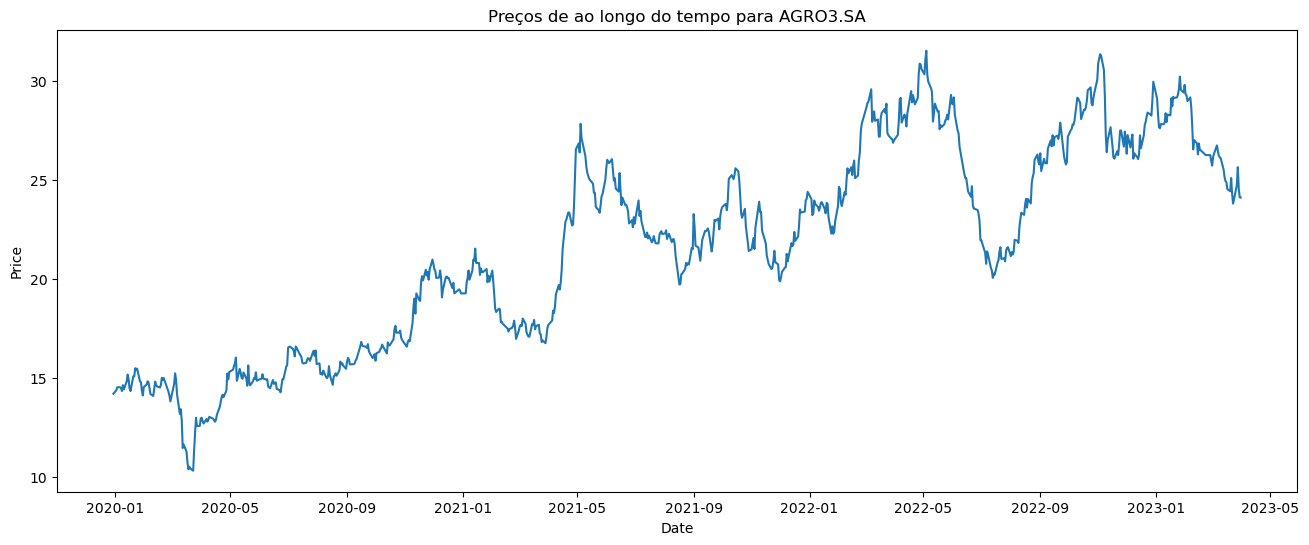

In [8]:
import matplotlib.pyplot as plt

ativo = "AGRO3.SA"
prices = preLast[ativo]

fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.plot(prices.index, prices.values)
ax1.set_title(f"Preços de ao longo do tempo para {ativo}")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

In [9]:
# Para ilustrar fazer um grafico de barras da série de volumes (Não Obrigatório)

Text(0, 0.5, 'Price')

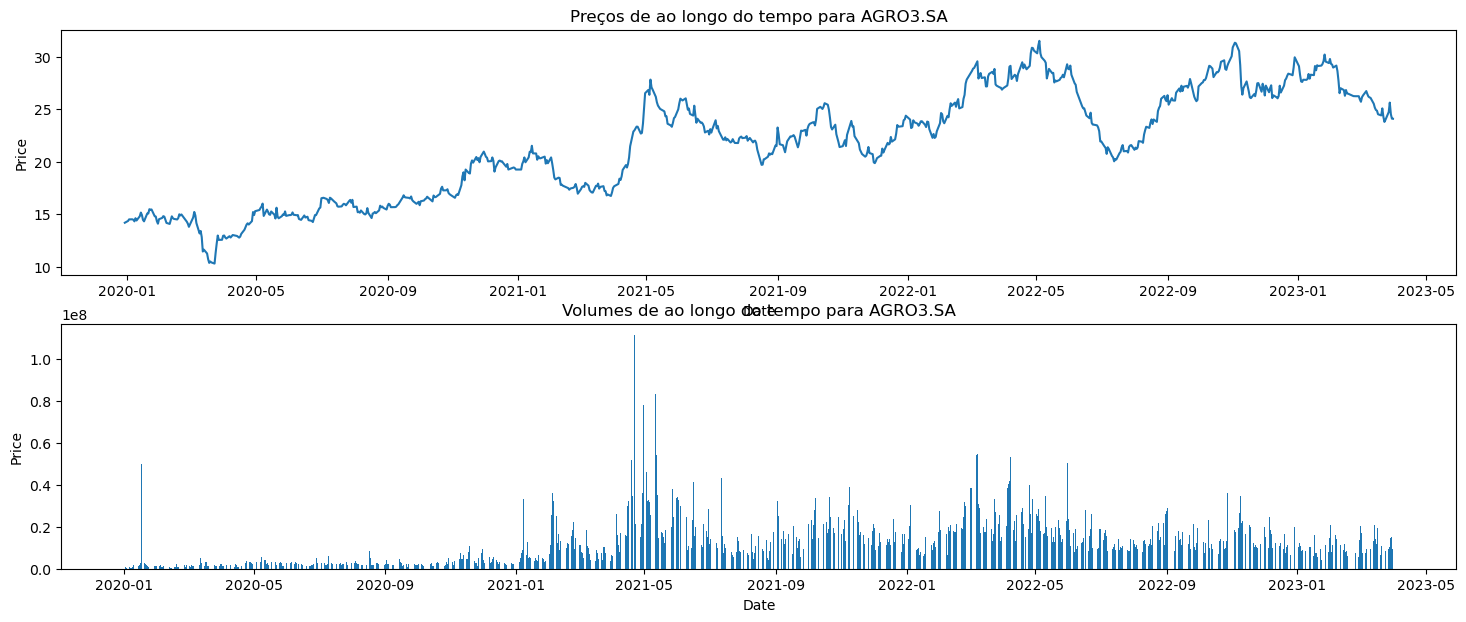

In [10]:
volu = volume[ativo]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 7))

ax1.plot(prices.index, prices.values)
ax1.set_title(f"Preços de ao longo do tempo para {ativo}")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

ax2.bar(volu.index, volu.values)
ax2.set_title(f"Volumes de ao longo do tempo para {ativo}")
ax2.set_xlabel("Date")
ax2.set_ylabel("Price")

In [11]:
#SEGUNDA OPÇÃO  - Colocar preço e voluime no mesmo gráfico (Não Obrigatório)

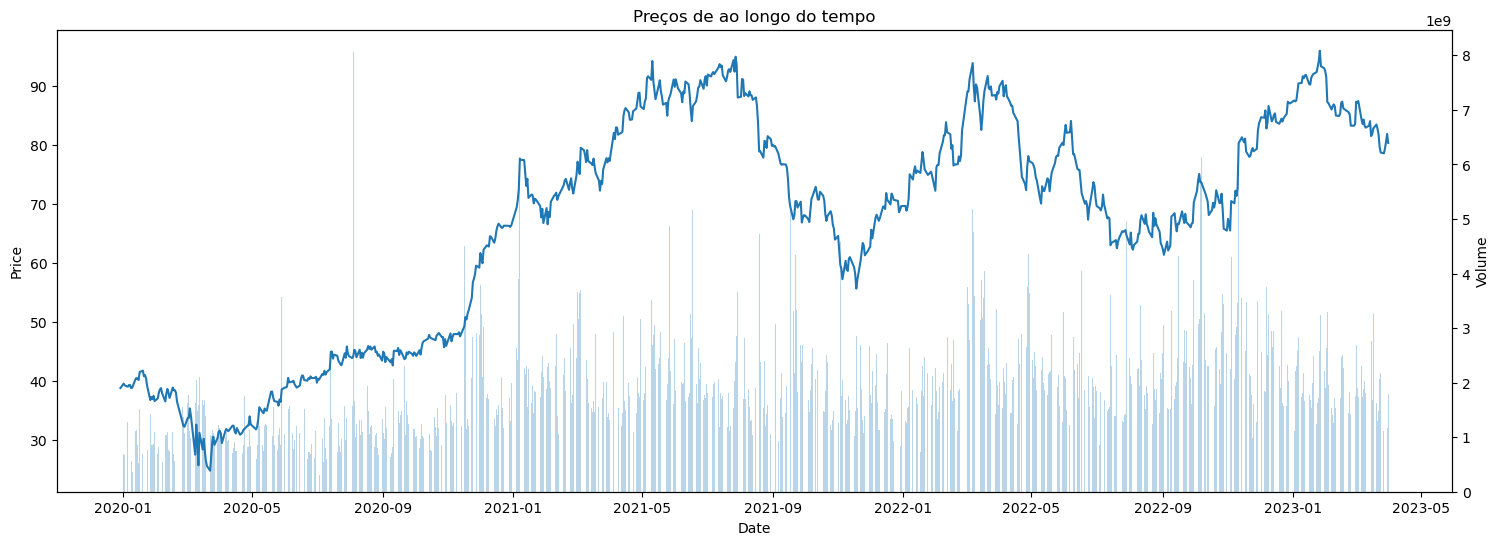

In [12]:
import matplotlib.pyplot as plt

ativo = "VALE3.SA"
prices = preLast[ativo]

fig, ax1 = plt.subplots(figsize=(18, 6))
ax1.plot(prices.index, prices.values)
ax1.set_title("Preços de ao longo do tempo")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

# Criando o gráfico de volume
ax2 = ax1.twinx()  # Criando um segundo eixo y compartilhando o mesmo eixo x
ax2.bar(volume.index, volume[ativo], alpha=0.3)  # Criando o gráfico de barras
ax2.set_ylabel("Volume")

plt.show()

In [13]:
#PARTE 2 - CRIANDO AS SÉRIES DE LN RETORNOS

In [14]:
LnRetornos = np.log(preLast).diff()
#Excluir a primeira linha
LnRetornos = LnRetornos.iloc[1:]

In [15]:
LnRetornos

,BALM4.SA,EPAR3.SA,EALT4.SA,CTSA3.SA,HBTS5.SA,RDNI3.SA,PTNT3.SA,MTSA4.SA,PFRM3.SA,CSUD3.SA,...,BBAS3.SA,SANB4.SA,BPAC11.SA,BBDC4.SA,WEGE3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,.BVSP,DI_INDEX
Data,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,-0.019803,0.001526,-0.023717,0.0,0.005063,0.000000,0.021479,0.019894,0.065507,...,0.018384,0.048527,0.002231,0.036377,0.016596,0.025162,0.017083,0.019140,0.025002,0.000342
2020-01-03,-0.001021,0.001665,0.000000,0.014297,0.0,-0.001896,0.000000,-0.021053,0.053110,0.067923,...,-0.001674,0.025975,0.000655,0.000506,-0.012852,-0.010574,-0.008177,-0.007390,-0.007334,0.000171
2020-01-06,0.005094,-0.001665,0.041797,-0.009509,0.0,-0.005073,0.000000,0.122029,0.099741,0.023979,...,-0.013307,-0.057462,-0.011858,-0.018023,0.002584,-0.014994,0.011753,-0.005951,-0.007066,0.000171
2020-01-07,0.000000,0.056695,0.008734,-0.004788,0.0,0.003807,0.000000,0.052818,-0.086893,0.076445,...,-0.007576,-0.014515,0.011565,-0.017525,0.007711,-0.023473,-0.003902,0.007248,-0.001850,0.000171
2020-01-08,0.000000,-0.015873,0.004338,-0.008032,0.0,0.025634,0.000000,0.009246,0.011284,0.007076,...,-0.009167,-0.013830,-0.006627,-0.015590,-0.038572,-0.016428,-0.006210,0.000185,-0.003563,0.000171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,-0.009950,0.009823,0.000000,0.055959,0.0,-0.026668,0.045047,0.039044,0.036010,0.052644,...,0.000532,0.008596,0.012834,0.017934,0.016647,0.017080,0.016968,-0.001654,0.008476,0.000508
2023-03-28,0.000000,0.018402,0.012997,0.065813,0.0,-0.010870,0.000000,-0.001220,0.003210,0.000000,...,0.006889,-0.003573,0.020511,-0.001547,0.004360,0.004646,0.017533,0.010512,0.015082,0.000508
2023-03-29,-0.030459,-0.039144,-0.026164,-0.052299,0.0,-0.012832,-0.013182,0.000000,-0.003210,-0.023872,...,0.011552,0.004286,-0.008364,0.005403,0.008664,0.009646,0.013056,0.014261,0.005985,0.000508


In [16]:
#PARTE 3 - CRIANDO AS FUNÇÕES PARA OS INDICADORES DE RISCO

In [17]:
#RETRONO COM INPUT DOS PREÇOS

In [18]:
def retorno(preco_inicial,preco_final):
    
    """
    Descrição:
    Calcula o log returno entre dois preços.
    
    Parametros:
    preco_inicial : float
    preco_final : float

    
    Resultado:
    log_retorno : float

    """
    ln_ret = np.log(preco_final/preco_inicial)
    return ln_ret

In [19]:
#Testando a função retorno

preco_inicial = 11
preco_final = 10

ln_ret = retorno(preco_inicial,preco_final)
print(ln_ret)

-0.0953101798043249


In [20]:
#Criando a formula de retorno com base em um ativo e duas datas

In [21]:
#RETORNO COM INPUT DAS DATAS

In [22]:
def ret_datas (preLast, data_inicial, data_final, ativo):
    
    """
    Descrição:
    Calcula o log retorno entre dois preços com base em duas datas para um ativo da preLast.
    
    Parametros:
    preLast: DataFrame contendo os preços dos ativos
    data_inicial : str (no formato de data AAAA-MM-DD)
    data_final : str (no formato de data AAAA-MM-DD)
    ativo: str

    
    Resultado:
    log_retorno : float

    """ 
    
    preco_inicial = preLast.loc[data_inicial, ativo]
    preco_final = preLast.loc[data_final, ativo]
    
    ln_ret_entre_datas = np.log(preco_final/preco_inicial)
    return ln_ret_entre_datas

In [23]:
data_inicial = '2019-12-30'
data_final = '2023-03-31'
ativo = 'PETR4.SA'

ret_datas (preLast, data_inicial, data_final, ativo)

0.45217654626665194

In [24]:
#VOLATILIDADE

In [25]:
def calc_vol_anual(preLast, ativo, data_inicial, data_final):
    
    """
    Descrição:
    Calcula a volatilidade dos ativos do DataFrame preLast com base em um ativo e duas datas

    Parametros:
    preLast: DataFrame contendo os preços dos ativos
    ativo: str
    data_inicial : str (no formato de data AAAA-MM-DD)
    data_final : str (no formato de data AAAA-MM-DD)
    
    Resultado:
    volatilidade anual : pandas.Series
    """
    
    prices  = preLast[ativo].loc[data_inicial:data_final]
    retornos = np.log(prices / prices.shift(1)).dropna()
    vol_diaria = retornos.std()
    vol_anual = vol_diaria * np.sqrt(252)
    
    return vol_anual

In [26]:
ativo = 'PETR4.SA'
start_date = '2023-01-01'
end_date = '2023-02-15'

vol = calc_vol_anual(preLast, ativo, data_inicial, data_final)
vol

0.5287007119866236

In [27]:
#Índice de Sharpe

In [28]:
def sharpe_ratio(preLast, ativo, data_inicial, data_final):

    """
    Descrição:
    Calcula o Índice de Sharpe para um determinado ativo com base em uma data inicial e uma data final usando a variação do CDI.

    Parametros:
    preLast: DataFrame contendo os preços dos ativos
    ativo: str
    data_inicial : str (no formato de data AAAA-MM-DD)
    data_final : str (no formato de data AAAA-MM-DD)

    Resultado:
    sharpe_ratio : float

    """
        
    prices = preLast[ativo].loc[data_inicial:data_final]
    returns = np.log(prices / prices.shift(1)).dropna()
    ret_ativo = sum(returns)

    rf = preLast["DI_INDEX"].loc[data_inicial:data_final]
    rf_returns = np.log(rf / rf.shift(1)).dropna()
    ret_rf = sum(rf_returns)

    excess_returns = ret_ativo - ret_rf
    returns_std = returns.std()
    sharpe_ratio = excess_returns / returns_std

    return sharpe_ratio

In [29]:
ativo = 'VALE3.SA'
data_inicial = '2020-01-02'
data_final = '2023-03-31'


sharpe = sharpe_ratio(preLast, ativo, data_inicial, data_final)
sharpe

18.284293336824827

In [30]:
#Índice de Sortino

In [31]:
def sortino_ratio(preLast, ativo, data_inicial, data_final):

    """
    Descrição:
    Calcula o Índice de Sortino para um determinado ativo com base em uma data inicial e uma data final usando a variação do CDI.

    Parametros:
    preLast: DataFrame contendo os preços dos ativos
    ativo: str
    data_inicial : str (no formato de data AAAA-MM-DD)
    data_final : str (no formato de data AAAA-MM-DD)

    Resultado:
    sortino_ratio : float

    """
        
    prices = preLast[ativo].loc[data_inicial:data_final]
    returns = np.log(prices / prices.shift(1)).dropna()
    ret_ativo = sum(returns)

    rf = preLast["DI_INDEX"].loc[data_inicial:data_final]
    rf_returns = np.log(rf / rf.shift(1)).dropna()
    ret_rf = sum(rf_returns)

    excess_returns = ret_ativo - ret_rf
    returns_std = returns[returns<0].std()
    sortino_ratio = excess_returns / returns_std

    return sortino_ratio

In [32]:
ativo = 'VALE3.SA'
data_inicial = '2020-01-02'
data_final = '2023-03-31'


sortino = sortino_ratio(preLast, ativo, data_inicial, data_final)
sortino

26.984624027052583

In [33]:
#BETA

In [34]:
def beta(preLast, ativo, data_inicial, data_final):
    
    """
    Descrição:
    Calcula o beta para um ativo ou um portfolio com base em uma data de inicio e fim

    Parametros:
    preLast: DataFrame contendo os preços dos ativos
    ativo: str 
    data_inicial : str (no formato de data AAAA-MM-DD)
    data_final : str (no formato de data AAAA-MM-DD)
    
    Resultado:
    beta : float
    
    """

    prices = preLast[ativo].loc[data_inicial:data_final]
    returns = np.log(prices / prices.shift(1)).dropna()
    
    rb = preLast[".BVSP"].loc[data_inicial:data_final]
    rb_returns = np.log(rb / rb.shift(1)).dropna()
    
    cov = np.cov(returns, rb_returns)[0, 1]
    var = np.var(rb_returns)
    
    beta = cov / var
    
    return beta

In [35]:
ativo = 'VALE3.SA'
data_inicial = '2020-01-02'
data_final = '2023-03-31'

beta = beta(preLast, ativo, data_inicial, data_final)

In [36]:
beta

0.9212158225861569

In [37]:
#ALFA

In [38]:
def alfa(preLast, ativo, rf, rb):
    
    """
    Descrição:
    Calcula o Alfa para um ativo ou um portfolio com base em uma data de inicio e fim

    Parametros:
    preLast: DataFrame contendo os preços dos ativos
    ativo: str 
    data_inicial : str (no formato de data AAAA-MM-DD)
    data_final : str (no formato de data AAAA-MM-DD)
    
    Resultado:
    beta : float
    
    """

    prices = preLast[ativo].loc[data_inicial:data_final]
    returns = np.log(prices / prices.shift(1)).dropna()
    ret_ativo = sum(returns)
    
    rf = preLast["DI_INDEX"].loc[data_inicial:data_final]
    rf_returns = np.log(rf / rf.shift(1)).dropna()
    ret_rf = sum(rf_returns)

    rb = preLast[".BVSP"].loc[data_inicial:data_final]
    rb_returns = np.log(rb / rb.shift(1)).dropna()
    ret_rb = sum(rb_returns)
    
    cov = np.cov(returns, rb_returns)[0, 1]
    var = np.var(rb_returns)
    beta = cov / var
    
    alfa = ret_ativo - (ret_rf + beta*(ret_rb-ret_rf))
    
    return alfa

In [39]:
ativo = 'VALE3.SA'
data_inicial = '2020-01-02'
data_final = '2023-03-31'

alfa = alfa(preLast, ativo, data_inicial, data_final)

In [40]:
alfa

0.8298569229195227

In [41]:
def MDD(ativo):
    
        
    """
    Descrição:
    Calcula o Máximo Drawdown para um ativo

    Parametros:
    preLast: Pandas DataFrame já importado
    ativo: str 

    
    Resultado:
    MDD : df
    
    """

    data = preLast[ativo]

    # Calcula os retornos diários do ativo financeiro
    returns = preLast[ativo].pct_change()

    # Calcula o Max Drawdown do ativo financeiro
    cum_returns = (1 + returns).cumprod()
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max * 100  # Multiplica por 100 para exibir em porcentagem
    
    return drawdown


In [42]:
MDD("AGRO3.SA")

Data
2019-12-30          NaN
2020-01-02     0.000000
2020-01-03     0.000000
2020-01-06     0.000000
2020-01-07    -0.308327
                ...    
2023-03-27   -21.528451
2023-03-28   -18.673786
2023-03-29   -22.162821
2023-03-30   -23.526716
2023-03-31   -23.558434
Name: AGRO3.SA, Length: 810, dtype: float64

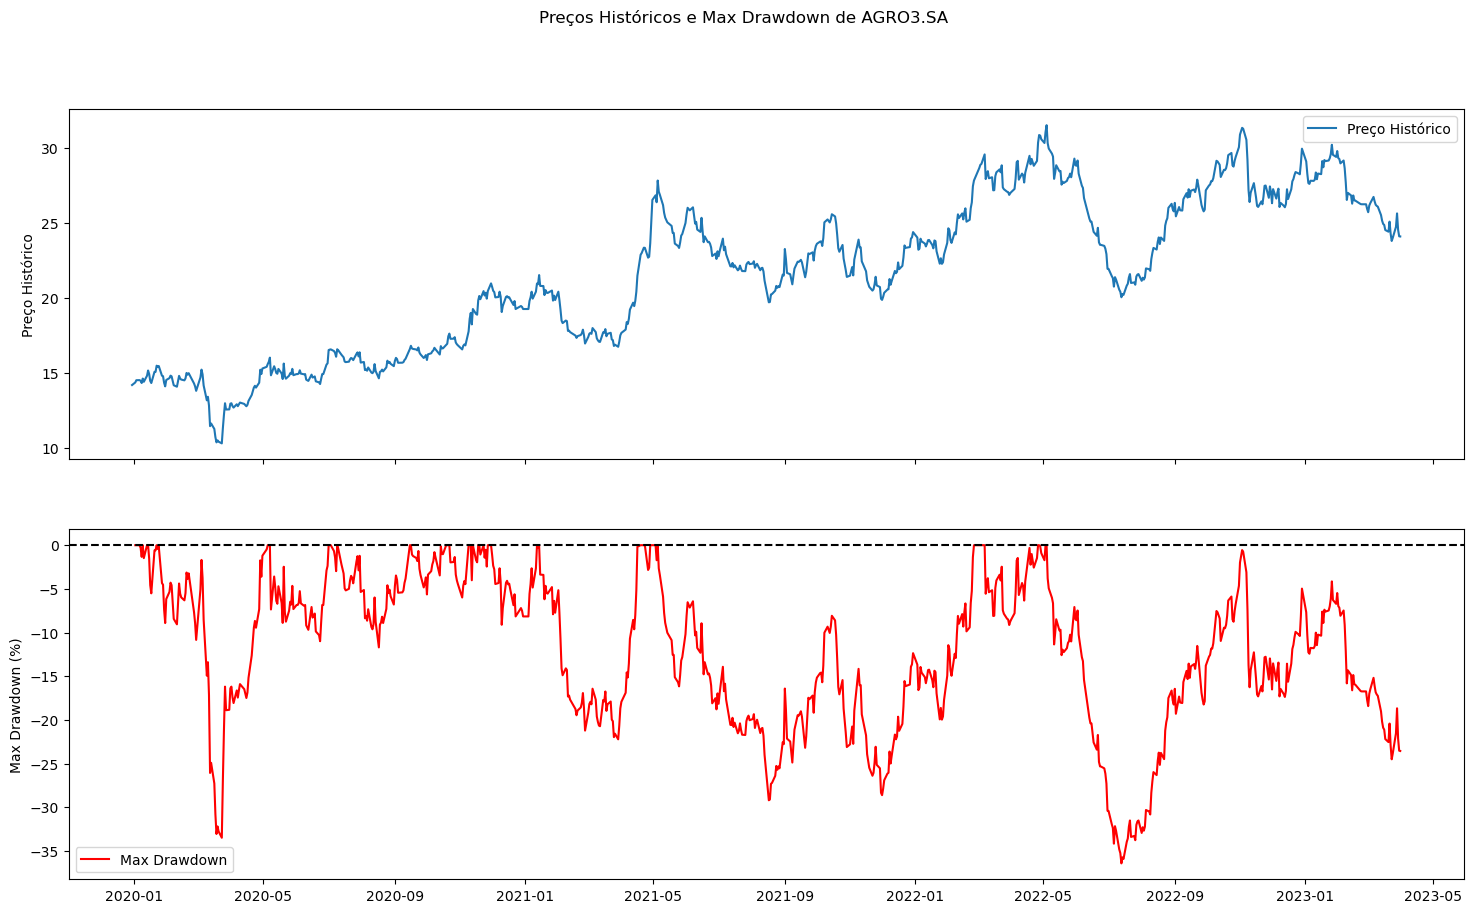

In [43]:
# Busca os preços históricos
ticker = 'AGRO3.SA'
data = preLast[ticker]

# Calcula os retornos diários do ativo financeiro
returns = preLast[ticker].pct_change()

# Calcula o Max Drawdown do ativo financeiro
cum_returns = (1 + returns).cumprod()
running_max = cum_returns.cummax()
drawdown = (cum_returns - running_max) / running_max * 100  # Multiplica por 100 para exibir em porcentagem

# Cria o gráfico de preços históricos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# Gráfico superior com a série de preços históricos
ax1.plot(preLast[ticker], label='Preço Histórico')
ax1.set_ylabel('Preço Histórico')

# Gráfico inferior com a série do drawdown
ax2.plot(drawdown, color='red', label='Max Drawdown')
ax2.set_ylabel('Max Drawdown (%)')  # Adiciona unidade de medida em porcentagem
ax2.axhline(y=0, color='black', linestyle='--')

# Adiciona legenda aos gráficos
ax1.legend(loc='best')
ax2.legend(loc='best')

# Adiciona título à figura
fig.suptitle('Preços Históricos e Max Drawdown de {}'.format(ticker))

plt.show()